In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.dtypes

Day      datetime64[ns]
Time             object
Bio              object
Dust             object
T               float64
H               float64
PM2.5           float64
dtype: object

In [6]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [7]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [8]:
#df1=df1[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
#df = df.resample('H', on='Date_Time').sum()
#df=df.reset_index()
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9

In [9]:
df.drop(['Day','Time'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

In [11]:
X=df.drop('Bio',axis=1)
Y=df['Bio']

In [12]:
X=minmax_scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [14]:
y_test.shape

(15911,)

In [16]:
def nash_sutcliffe_efficiency(observed, modeled):
    """Calculate Nash-Sutcliffe Efficiency (NSE)"""
    mean_observed = np.mean(observed)
    numerator = np.sum((observed - modeled) ** 2)
    denominator = np.sum((observed - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  86.74952668465725
--------------------------------------------------
Mean absolute error (MAE) :  55.789980240940935
--------------------------------------------------
R2 score :  0.6134111516082768
--------------------------------------------------
Willmott's Index: 41.713349323294615
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.6134111516082768


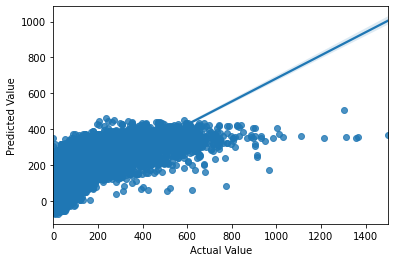

							-----------------------------------------------------------
							 Time for detection (Ridge) : 1.719 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  86.29606812213157
--------------------------------------------------
Mean absolute error (MAE) :  56.0237337845956
--------------------------------------------------
R2 score :  0.6174421557956682
--------------------------------------------------
Willmott's Index: 41.469135020213656
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.6174421557956682


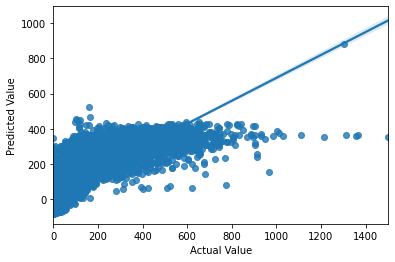

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 1.598 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  85.64771821080886
--------------------------------------------------
Mean absolute error (MAE) :  33.54501916912828
--------------------------------------------------
R2 score :  0.6231689428705696
--------------------------------------------------
Willmott's Index: 64.95379984344318
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.6231689428705696


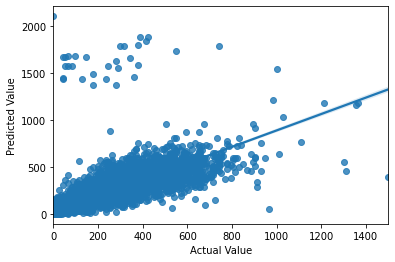

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 2.569 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  86.78092118930843
--------------------------------------------------
Mean absolute error (MAE) :  32.19744390673119
--------------------------------------------------
R2 score :  0.6131312892966282
--------------------------------------------------
Willmott's Index: 66.3616807611401
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.6131312892966282


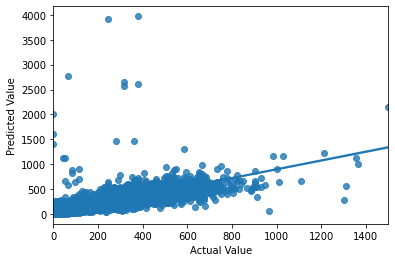

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 29.186 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  119.40901311373517
--------------------------------------------------
Mean absolute error (MAE) :  39.56866318898875
--------------------------------------------------
R2 score :  0.2675308930334185
--------------------------------------------------
Willmott's Index: 58.66059032320064
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.2675308930334185


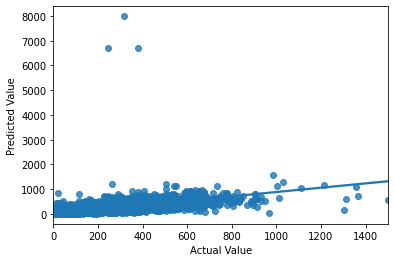

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 1.842 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  87.105292069705
--------------------------------------------------
Mean absolute error (MAE) :  55.936855624755104
--------------------------------------------------
R2 score :  0.6102337982424313
--------------------------------------------------
Willmott's Index: 41.55990108487596
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.6102337982424313


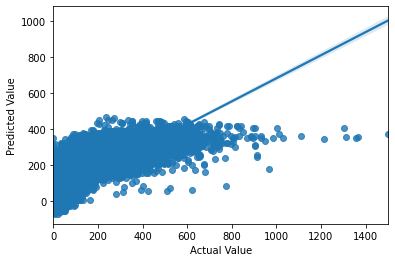

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 1.762 seconds...
							-----------------------------------------------------------



,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,0.333745,0.613411,55.789980,86.749527,0.613411,41.713349
1,0.336386,0.617442,56.023734,86.296068,0.617442,41.469135
2,0.572784,0.623169,33.545019,85.647718,0.623169,64.953800
3,0.907267,0.613131,32.197444,86.780921,0.613131,66.361681
4,1.000000,0.267531,39.568663,119.409013,0.267531,58.660590
5,0.332113,0.610234,55.936856,87.105292,0.610234,41.559901


In [20]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import BernoulliNB

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
nse_l=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    
    
    



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    print("-"*50)
    #nse = nash_sutcliffe_efficiency(y_test, predictions)
    #print(f"Nash-Sutcliffe efficiency (NSE): {nse}")
    nse_l.append(nse)
    sns.regplot(x=y_test,y=predictions)
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l, "R2 Score": r2_l,
                    "Willmot Index": wi_l})
comp

In [49]:

# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [50]:
train_labels=y_train
test_labels=y_test

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional

In [52]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
model.add(LSTM(32),return_sequences=True)
model.add(Dense(1))  # Output layer with single neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


Epoch 1/50
1492/1492 [==============================] - 12s 5ms/step - loss: 42140.9883 - val_loss: 24802.5684
Epoch 2/50
1492/1492 [==============================] - 7s 5ms/step - loss: 38527.5781 - val_loss: 23962.4004
Epoch 3/50
1492/1492 [==============================] - 8s 5ms/step - loss: 38206.9258 - val_loss: 23877.1777
Epoch 4/50
1492/1492 [==============================] - 7s 5ms/step - loss: 38149.3906 - val_loss: 23850.1836
Epoch 5/50
1492/1492 [==============================] - 7s 5ms/step - loss: 38127.6055 - val_loss: 23829.5137
Epoch 6/50
1492/1492 [==============================] - 7s 5ms/step - loss: 38114.8984 - val_loss: 23821.0020
Epoch 7/50
1492/1492 [==============================] - 7s 5ms/step - loss: 38107.9102 - val_loss: 23817.2910
Epoch 8/50
1492/1492 [==============================] - 8s 5ms/step - loss: 38103.8672 - val_loss: 23816.5000
Epoch 9/50
1492/1492 [==============================] - 7s 5ms/step - loss: 38101.9062 - val_loss: 23811.5547
Epoch 10/

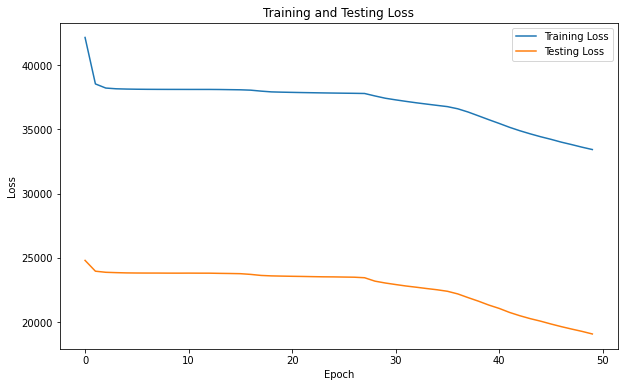

In [53]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

In [ ]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and record training history
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

Epoch 1/50
1492/1492 [==============================] - 20s 11ms/step - loss: 33242.0703 - val_loss: 13312.5547
Epoch 2/50
1492/1492 [==============================] - 16s 11ms/step - loss: 26344.2422 - val_loss: 11681.6875
Epoch 3/50
1492/1492 [==============================] - 17s 11ms/step - loss: 25481.2812 - val_loss: 11217.6396
Epoch 4/50
1492/1492 [==============================] - 15s 10ms/step - loss: 25434.0430 - val_loss: 11731.0195
Epoch 5/50
1492/1492 [==============================] - 15s 10ms/step - loss: 25160.2910 - val_loss: 11563.5654
Epoch 6/50
1492/1492 [==============================] - 15s 10ms/step - loss: 25148.6133 - val_loss: 10993.4326
Epoch 7/50
1492/1492 [==============================] - 16s 11ms/step - loss: 24963.7539 - val_loss: 11033.2471
Epoch 8/50
1492/1492 [==============================] - 17s 11ms/step - loss: 24751.7949 - val_loss: 10310.5098
Epoch 9/50
1492/1492 [==============================] - 18s 12ms/step - loss: 24232.3574 - val_loss: 100